# Interactive PCA plotting of Frog pose

In [1]:
import os
import pathlib
from collections import defaultdict

import ipywidgets as widgets
import matplotlib
from shared import set_frog, settings, show_pca

stg = None
cfgs = None
mov = None


def set_stage(STAGES):
    global stg
    stg = None
    drop_down_stg = widgets.Dropdown(
        options=STAGES, description="Stage?", disabled=False
    )

    def stage_handler(change):
        global stg, cfgs
        print(change.new)
        stg = change.new  # This line isn't working
        cfgs = cfg[stg]

    drop_down_stg.observe(stage_handler, names="value")
    display(drop_down_stg)


def set_movie(root):
    global mov
    mov = None

    ROOT_DIR = pathlib.Path(root)

    all_movs = list(ROOT_DIR.rglob("*.mp4"))

    drop_down_mov = widgets.Dropdown(
        options=all_movs,
        description="Movie?",
        disabled=False,
        layout={"width": "max-content"},
    )

    def mov_handler(change):
        global mov
        print(change.new)
        mov = change.new  # This line isn't working

    drop_down_mov.observe(mov_handler, names="value")
    display(drop_down_mov)

### 1 .Choose settings yaml file

In [2]:
cfg = settings("../analysis_settings.template.yml")

 - Using settings '../analysis_settings.template.yml'
 - Results -> './results_test_subf'


### 2. Choose stage

In [12]:
set_stage(cfg["STAGES"])

Dropdown(description='Stage?', options=('52-54', '57-58'), value='52-54')

### 3. Choose movie

In [13]:
set_movie(cfgs["ROOT_DIR"])

Dropdown(description='Movie?', layout=Layout(width='max-content'), options=(WindowsPath('B:/group/sweengrp/Peo…

### 4. Load SLEAP and align

In [14]:
frog = set_frog(mov, cfgs)

Reading B:\group\sweengrp\People\Chris\paper_videos\57-58\WT\134_2022-11-30_15-46-03_WT_Stg5758_2_4.mp4
 - Checking tracks
 - Aligning
Done


### 5. Choose your color preferences
See [list of color names](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors)

Colormap for lines (color look-up for PC0)
########################################################################################################################



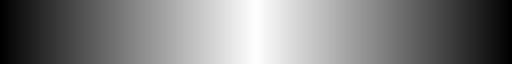




Colormap for dots (Tail_stem - Tail_tip)
########################################################################################################################



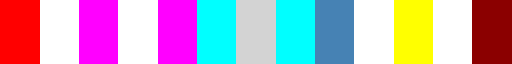

In [15]:
cmap_line = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["black", "white", "black"]
)


cmap_dots = matplotlib.colors.ListedColormap(
    [
        "red",
        "white",
        "magenta",
        "white",
        "magenta",
        "cyan",
        "lightgray",
        "cyan",
        "steelblue",
        "white",
        "yellow",
        "white",
        "darkred",
    ]
)

# cmap_line = cm.seismic
# cmap_dots = cm.seismic


print("Colormap for lines (color look-up for PC0)")
print("#" * 120 + "\n")
display(cmap_line)

print("\n" * 2)

print("Colormap for dots (Tail_stem - Tail_tip)")
print("#" * 120 + "\n")

display(cmap_dots)

In [16]:
cfgs["PCA_PARTS"]

{'Left_Leg': ['Tail_1',
  'Left_Hip',
  'Left_Knee',
  'Left_Ankle',
  'Left_Foot',
  'Left_toe']}

### 6. Plot

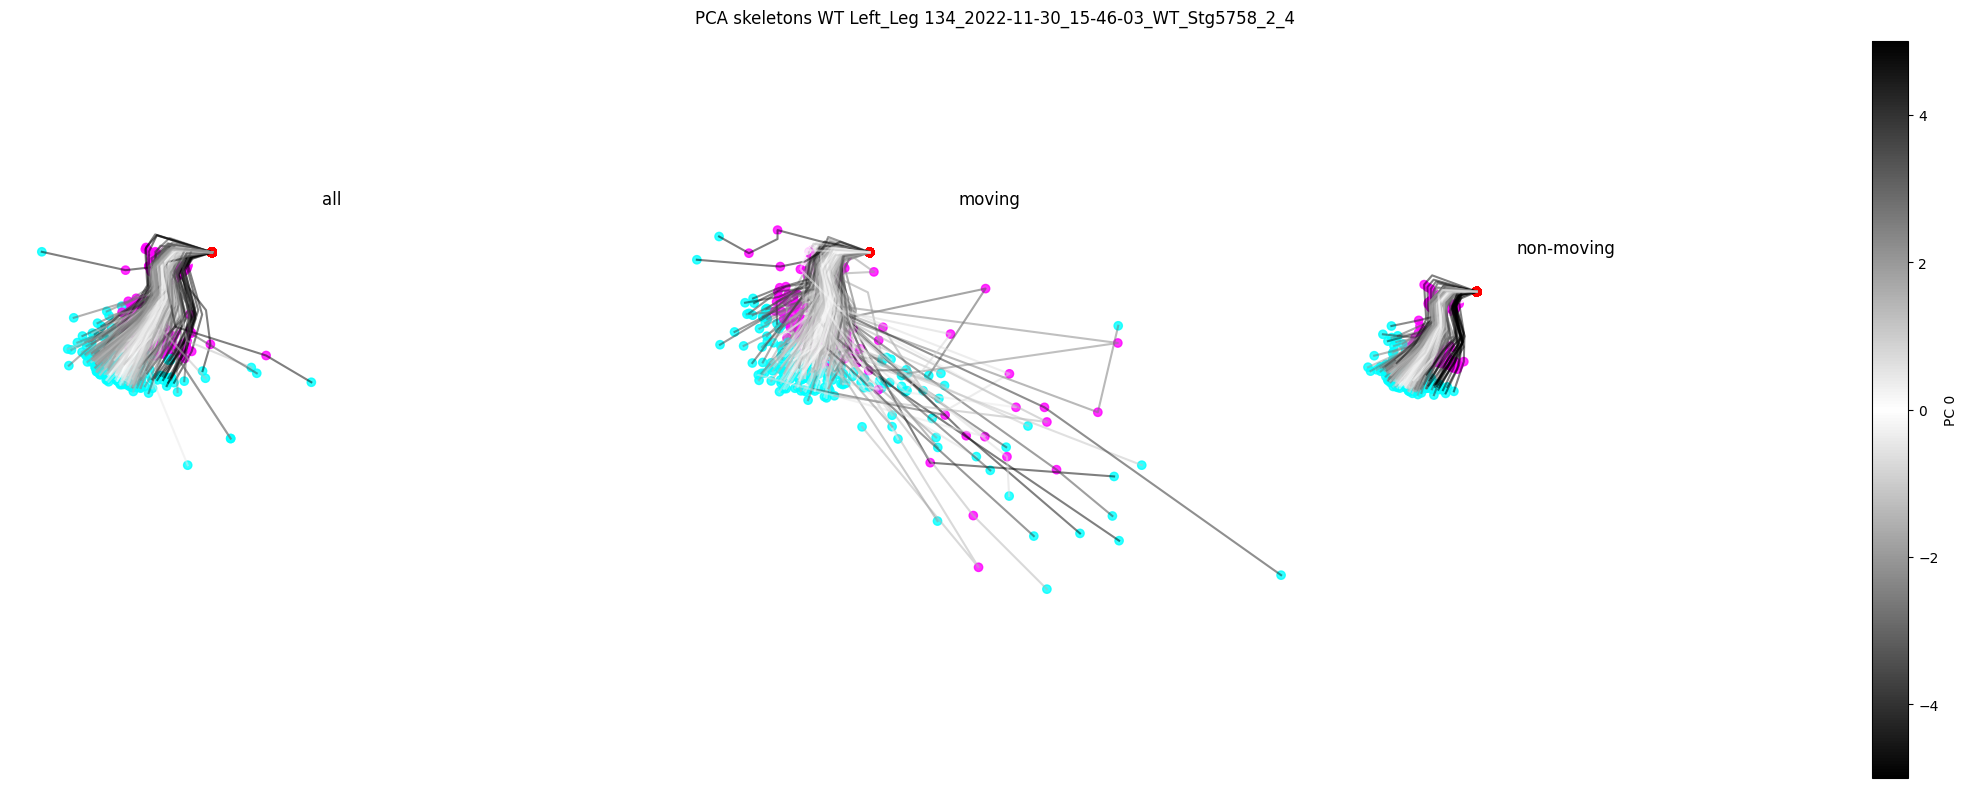

In [17]:
show_pca(
    cfgs,
    frog,
    parts_dict=cfgs["PCA_PARTS"],
    size_pca=cfg["PCA_FIT_ON_N"],
    size_plot=cfg["PCA_PLOT_N"],
    cmap_line=cmap_line,
    cmap_dots=cmap_dots,
    vmin=-5,
    vmax=5,
    alpha_dots=0.8,
    alpha_line=0.5,
    line_zorder=33,
)